In [3]:
# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
ten_nachos = make_array('neither', 'cheese', 'both', 'both', 'cheese', 'salsa', 'both', 'neither', 'cheese', 'both')
number_cheese = np.count_nonzero(ten_nachos == 'cheese')
number_cheese

3

In [5]:
say_please = '?'

if number_cheese <5:
    say_please = 'More please'
say_please

'More please'

In [6]:
def nacho_reaction(nacho):
    if nacho == "cheese":
        return "Cheesy!"
    if nacho == "salsa":
        return "Spicy!"
    if nacho == "both":
        return "Wow!"
    if nacho == "neither":
        return "Meh."
spicy_nacho = nacho_reaction('salsa')
spicy_nacho

'Spicy!'

In [7]:
ten_nachos_tbl = Table().with_column('Nachos', ten_nachos)
ten_nachos_reactions = ten_nachos_tbl.apply(nacho_reaction, 'Nachos')
ten_nachos_reactions

array(['Meh.', 'Cheesy!', 'Wow!', 'Wow!', 'Cheesy!', 'Spicy!', 'Wow!',
       'Meh.', 'Cheesy!', 'Wow!'],
      dtype='<U7')

In [ ]:
number_wow_reactions = np.count_nonzero(ten_nachos_reactions == 'Wow!')
number_wow_reactions

4

In [8]:
austen_string = open('Austen_PrideAndPrejudice.txt', encoding='utf-8').read()
p_and_p_words = np.array(austen_string.split())

longer_than_five = 0

for i in p_and_p_words:
    if len(i) > 5:
        longer_than_five+=1
longer_than_five

35453

In [11]:
trials = 10000
num_different = 0

for i in range(trials):
  first = np.random.choice(p_and_p_words)
  second = np.random.choice(p_and_p_words)
  if first != second:
    num_different+=1
num_different

9936

In [12]:

full_data = Table.read_table("nba.csv")

# The show method immediately displays the contents of a table.
# Think of it like the `print()` function
full_data.show(10)

Player,Salary Rank,Salary,Player Rank,Age,Team,Position,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
Stephen Curry,1,51915615,11,35,GSW,PG,74,4.5,5.1,0.7,0.4,2.8,26.4
Kevin Durant,2,47649433,7,35,PHO,PF,75,6.6,5,0.9,1.2,3.3,27.1
Joel Embiid,3,47607350,1,29,PHI,C,39,11,5.6,1.2,1.7,3.8,34.7
LeBron James,3,47607350,15,39,LAL,PF,71,7.3,8.3,1.3,0.5,3.5,25.7
Bradley Beal,6,46741590,63,30,PHO,SG,53,4.4,5,1,0.5,2.5,18.2
Damian Lillard,7,45640084,20,33,MIL,PG,73,4.4,7,1,0.2,2.6,24.3
Giannis Antetokounmpo,7,45640084,3,29,MIL,PF,73,11.5,6.5,1.2,1.1,3.4,30.4
Kawhi Leonard,7,45640084,25,32,LAC,SF,68,6.1,3.6,1.6,0.9,1.8,23.7
Paul George,7,45640084,31,33,LAC,PF,74,5.2,3.5,1.5,0.5,2.1,22.6
Jimmy Butler,11,45183960,44,34,MIA,PF,60,5.3,5,1.3,0.3,1.7,20.8


Two histograms should be displayed below


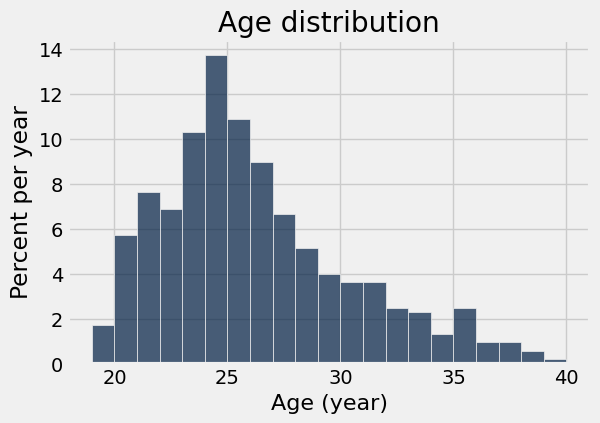

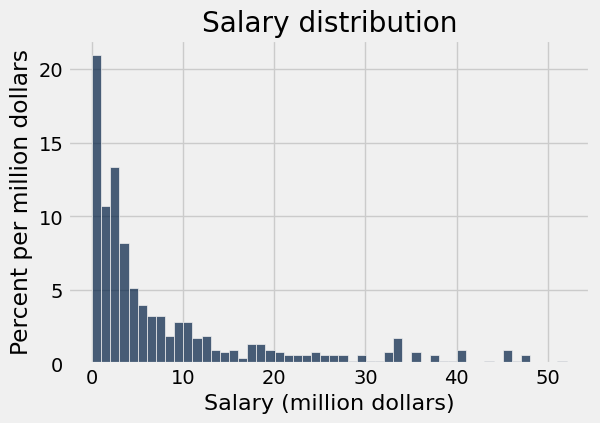

In [13]:

def histograms(t):
    ages = t.column('Age')
    salaries = t.column('Salary')/1000000
    t1 = t.drop('Salary').with_column('Salary', salaries)
    age_bins = np.arange(min(ages), max(ages) + 2, 1)
    salary_bins = np.arange(min(salaries), max(salaries) + 1, 1)
    t1.hist('Age', bins=age_bins, unit='year')
    plt.title('Age distribution')
    t1.hist('Salary', bins=salary_bins, unit='million dollars')
    plt.title('Salary distribution')

histograms(full_data)
print('Two histograms should be displayed below')

array([  2.57371429e+01,   8.45035460e+06])

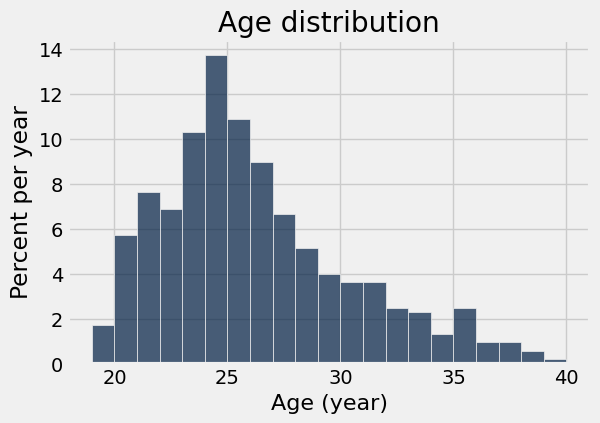

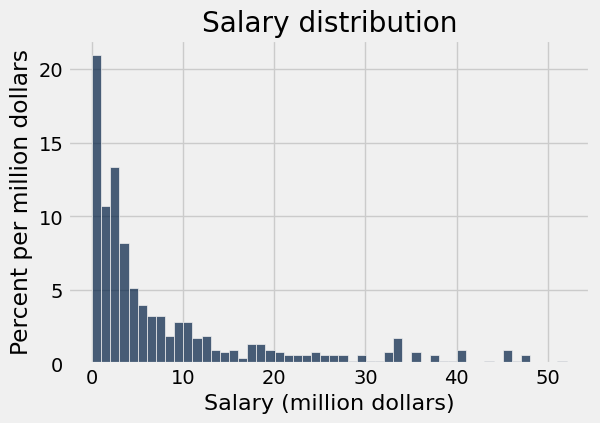

In [16]:

def compute_statistics(age_and_salary_data):
    # Vẽ histogram của tuổi và lương
    histograms(age_and_salary_data)

    # Tính giá trị trung bình của tuổi
    age = np.mean(age_and_salary_data.column('Age'))

    # Tính giá trị trung bình của lương
    salary = np.mean(age_and_salary_data.column('Salary'))

    # Trả về mảng chứa hai giá trị trung bình
    return np.array([age, salary])

# Gọi hàm với dữ liệu full_data và hiển thị kết quả
full_stats = compute_statistics(full_data)
full_stats


In [17]:
full_data.sample(5)

Player,Salary Rank,Salary,Player Rank,Age,Team,Position,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
Dejounte Murray,88,18214000,34,27,ATL,SG,78,5.3,6.4,1.4,0.3,2.6,22.5
Tim Hardaway Jr,91,17897728,104,31,DAL,SF,79,3.2,1.8,0.5,0.1,0.9,14.4
Jaime Jaquez,292,3510540,141,22,MIA,SF,75,3.8,2.6,1,0.3,1.5,11.9
Wendell Moore,368,2421720,554,22,MIN,SG,25,0.5,0.2,0.2,0,0.2,0.7
Brook Lopez,57,25000000,130,35,MIL,C,79,5.2,1.6,0.5,2.4,1,12.5


In [18]:
full_data.sample(5, with_replacement=False)

Player,Salary Rank,Salary,Player Rank,Age,Team,Position,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
Johnny Davis,243,5050800,453,21,WAS,SG,50,1.4,0.6,0.4,0.2,0.3,3
DJ Wilson,595,134863,348,27,PHI,PF,2,1,1,0,1,0,5
Dereon Seabron,489,559782,486,23,NOP,SG,6,1.2,0.8,0.3,0.2,0,2.3
Jacob Gilyard,482,701336,385,25,BRK,PG,4,0.8,1.5,1.5,0,0.3,0
Jordan Poole,48,27955357,68,24,WAS,SG,78,2.7,4.4,1.1,0.3,2.4,17.4


array([  2.58636364e+01,   8.01155473e+06])

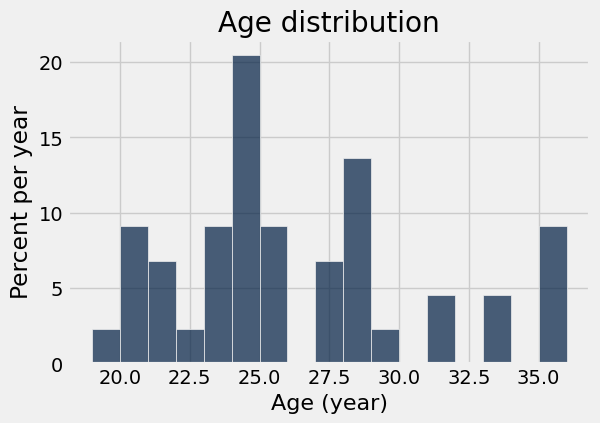

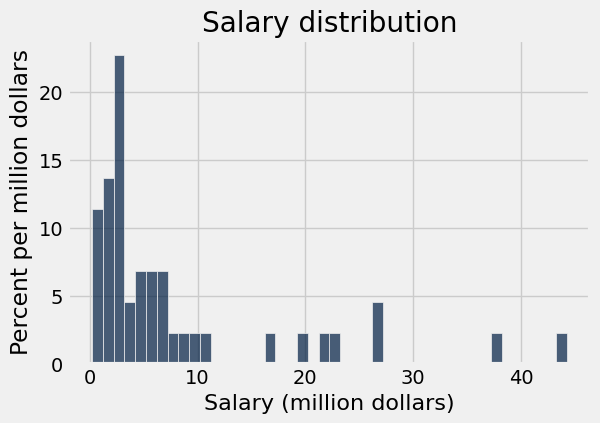

In [19]:
my_small_srswor_data = full_data.sample(44, with_replacement=False)
my_small_stats = compute_statistics(my_small_srswor_data)
my_small_stats

In [23]:
possible_point_values = np.array([1,2,3,4,5,6])
num_tosses = 1000
simulated_tosses = np.random.choice(possible_point_values, num_tosses )
total_score = np.sum(simulated_tosses)
total_score

3551

array([  2.55800000e+01,   8.26316844e+06])

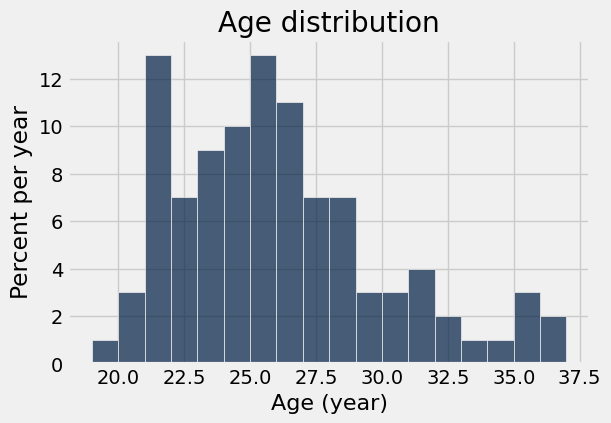

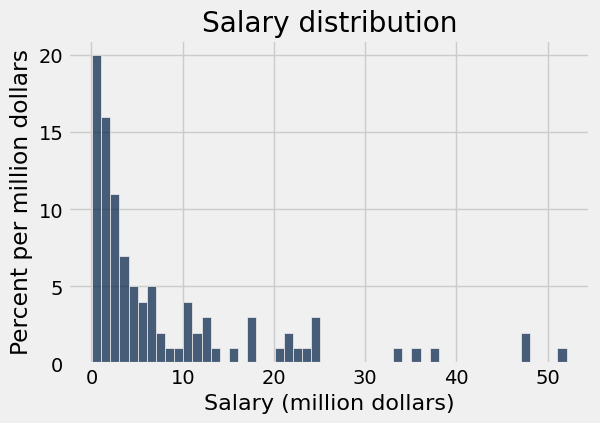

In [24]:
my_large_srswor_data = full_data.sample(100, with_replacement=False)
my_large_stats = compute_statistics(my_large_srswor_data)
my_large_stats